In [1]:
import pandas as pd
import numpy as np
import re
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MultiLabelBinarizer, PowerTransformer, LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import warnings

In [7]:
#Usaremos el CSV "AllDecks" tras la modificaciones realizadas previamente
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv('../CSV/AllDecks.csv')
df.head()

,code,mainBoard,meta,name,releaseDate,sideBoard,type,total_price,deck_color
0,KTK,"[{'artist': 'Zack Stella', 'borderColor': 'bla...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Abzan Siege,2014-09-26,[],Intro Pack,0.68,"['B', 'W', 'G']"
1,C18,"[{'artist': 'Winona Nelson', 'borderColor': 'b...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Adaptive Enchantment,2018-08-10,"[{'artist': 'Johannes Voss', 'borderColor': 'b...",Commander Deck,0.00,"['W', 'U', 'G']"
2,BTD,"[{'artist': 'Doug Chaffee', 'borderColor': 'wh...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Aerodoom,2000-10-01,[],Theme Deck,0.00,"['B', 'U']"
3,WTH,"[{'artist': 'Douglas Shuler', 'borderColor': '...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Forces,2007-12-12,[],MTGO Theme Deck,2.63,"['U', 'W']"
4,JUD,"[{'artist': 'Ron Spears', 'borderColor': 'blac...","{'date': '2019-11-10', 'pricesDate': '2019-11-...",Air Razers,2002-05-27,[],Theme Deck,0.68,"['R', 'U']"


In [9]:
le = LabelEncoder()
X = df[['name', 'type', 'deck_color', 'mainBoard']]
Y = df['total_price']
#Aplicamos la funcion get dumies para la columna que contiene datos de tipo string
X.loc[:, 'name'] = le.fit_transform(X['name'])
X.loc[:, 'type'] = le.fit_transform(X['type'])
X.loc[:, 'deck_color'] = le.fit_transform(X['deck_color'])
X.loc[:, 'mainBoard'] = le.fit_transform(X['mainBoard'])

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
Y_train_log = np.log1p(Y_train)
Y_test_log = np.log1p(Y_test)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet()
}

In [21]:
# Calcular las métricas de cada uno de los modelos
for name, model in models.items():
    model.fit(X_train, Y_train_log)
    Y_pred_log = model.predict(X_test)
    Y_pred = np.expm1(Y_pred_log)
    
    r2 = r2_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = mean_squared_error(Y_test, Y_pred, squared=False)
    mae = mean_absolute_error(Y_test, Y_pred)
    # Imprimir resultados
    print(f"Modelo: {name}")
    print(f"R2 = {r2}")
    print(f"MSE = {mse}")
    print(f"RMSE = {rmse}")
    print(f"MAE = {mae}")
    print("\n")

Modelo: LinearRegression
R2 = -0.01898495113761345
MSE = 77.37873257242332
RMSE = 8.796518207360416
MAE = 3.492938493783496


Modelo: Ridge
R2 = -0.01898835421156808
MSE = 77.37899099189181
RMSE = 8.79653289608422
MAE = 3.4929367648868284


Modelo: Lasso
R2 = -0.05793634967923089
MSE = 80.33658768864345
RMSE = 8.963067984158295
MAE = 3.510011461047632


Modelo: ElasticNet
R2 = -0.039858756426086606
MSE = 78.96382820644851
RMSE = 8.886159361976834
MAE = 3.4917610545425504




In [23]:
#Como los resultados no son satisfactorios relizaremos continuaremos con el modelo antiguo
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [25]:
X = df[['name','type','deck_color','mainBoard']]
Y = df['total_price'] 
#Aplicamos la funcion get dumies para la columna que contiene datos de tipo string
X = pd.get_dummies(X, columns=['name'])
X = pd.get_dummies(X, columns=['deck_color'])
X = pd.get_dummies(X, columns=['type'])
X = pd.get_dummies(X, columns=['mainBoard'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)

# valor de las metricas
print(f"R2 = {r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R2 = 0.10178347838214574
MSE = 68.20793176661341
RMSE = 8.258809343156761
MAE = 4.630030735297203


# Realizaremos los unos gráficos para ver las prediciones del modelo

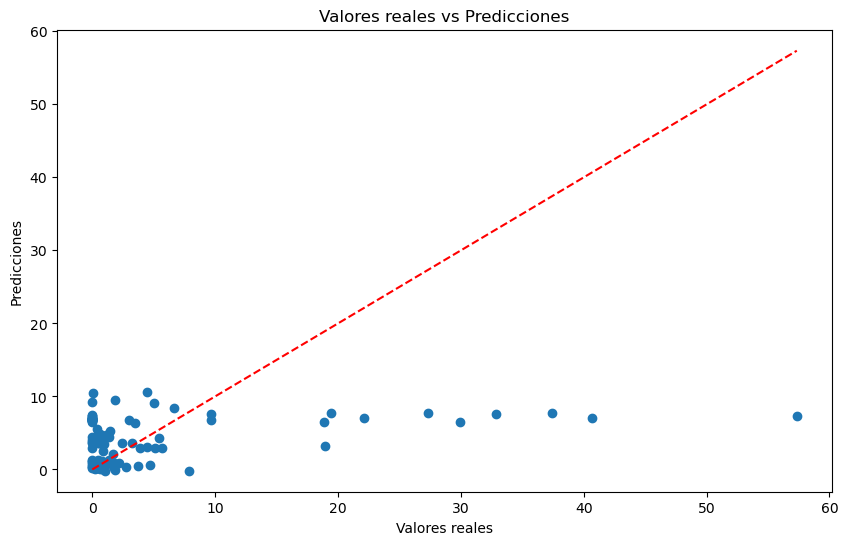

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.show()

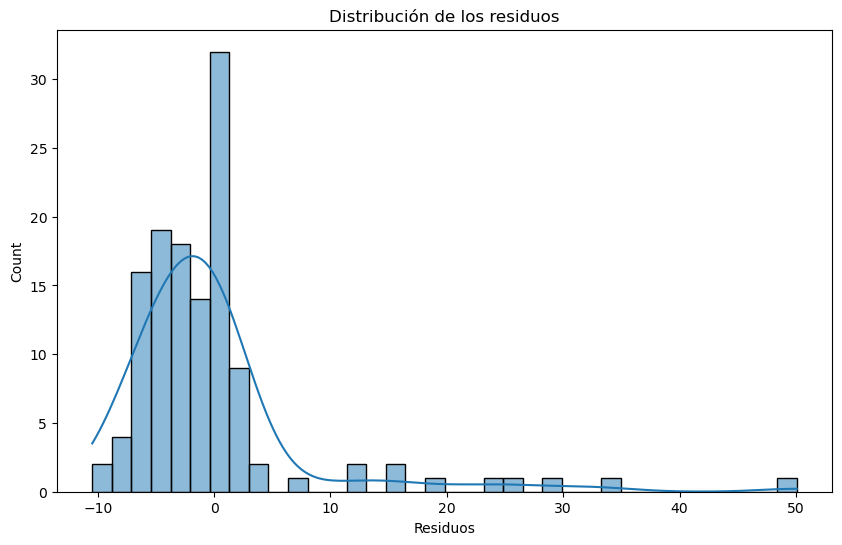

In [31]:
residuos = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los residuos')
plt.show()

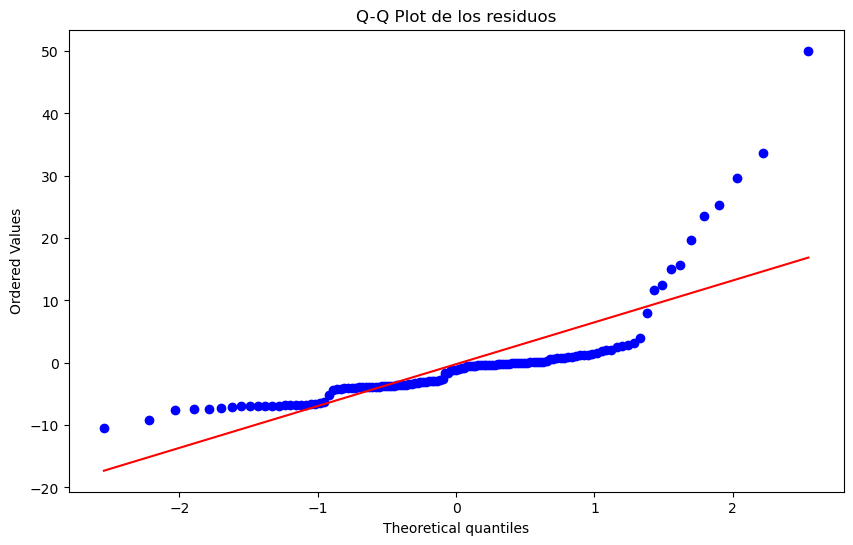

In [33]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()

In [227]:
#Numero de veces que se repite el tipo de mazo en el dataframe
typos = {}
for index, row in df.iterrows():
    typo = row['type']
    if typo in typos:
        typos[typo] += 1
    else:
        typos[typo] = 1
        
for typo, count in typos.items():
    print(f'{typo}: {count}')

Intro Pack: 167
Commander Deck: 47
Theme Deck: 184
MTGO Theme Deck: 18
Duel Deck: 52
Planeswalker Deck: 34
Welcome Deck: 20
Challenger Deck: 8
Archenemy Deck: 8
Clash Pack: 9
Guild Kit: 10
Game Night Deck: 5
Planechase Deck: 12
Event Deck: 27
Advanced Deck: 4
Basic Deck: 4
Duel Of The Planeswalkers Deck: 5
Brawl Deck: 4
Premium Deck: 3
Advanced Pack: 2
Starter Deck: 10
Spellslinger Starter Kit: 2


In [294]:
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[~((df['total_price'] < (Q1 - 1.5 * IQR)) | (df['total_price'] > (Q3 + 1.5 * IQR)))]

print(df_filtered)

    code                                          mainBoard  \
0    KTK  [{'artist': 'Zack Stella', 'borderColor': 'bla...   
1    C18  [{'artist': 'Winona Nelson', 'borderColor': 'b...   
2    BTD  [{'artist': 'Doug Chaffee', 'borderColor': 'wh...   
3    WTH  [{'artist': 'Douglas Shuler', 'borderColor': '...   
4    JUD  [{'artist': 'Ron Spears', 'borderColor': 'blac...   
..   ...                                                ...   
629  ITP  [{'artist': 'Dan Frazier', 'borderColor': 'whi...   
630  RQS  [{'artist': 'Christopher Rush', 'borderColor':...   
631  BFZ  [{'artist': 'Daniel Ljunggren', 'borderColor':...   
632  DDP  [{'artist': 'Zoltan Boros & Gabor Szikszai', '...   
634  LGN  [{'artist': 'Thomas M. Baxa', 'borderColor': '...   

                                                  meta                  name  \
0    {'date': '2019-11-10', 'pricesDate': '2019-11-...           Abzan Siege   
1    {'date': '2019-11-10', 'pricesDate': '2019-11-...  Adaptive Enchantment   
2  

In [296]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crear un nuevo DataFrame para los datos sin outliers
df_no_outliers = df.copy()

for col in num_cols:
    # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calcular IQR
    IQR = Q3 - Q1
    
    # Definir los límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los datos que están dentro de los límites
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

# Mostrar el DataFrame sin outliers
print(df_no_outliers)


    code                                          mainBoard  \
0    KTK  [{'artist': 'Zack Stella', 'borderColor': 'bla...   
1    C18  [{'artist': 'Winona Nelson', 'borderColor': 'b...   
2    BTD  [{'artist': 'Doug Chaffee', 'borderColor': 'wh...   
3    WTH  [{'artist': 'Douglas Shuler', 'borderColor': '...   
4    JUD  [{'artist': 'Ron Spears', 'borderColor': 'blac...   
..   ...                                                ...   
629  ITP  [{'artist': 'Dan Frazier', 'borderColor': 'whi...   
630  RQS  [{'artist': 'Christopher Rush', 'borderColor':...   
631  BFZ  [{'artist': 'Daniel Ljunggren', 'borderColor':...   
632  DDP  [{'artist': 'Zoltan Boros & Gabor Szikszai', '...   
634  LGN  [{'artist': 'Thomas M. Baxa', 'borderColor': '...   

                                                  meta                  name  \
0    {'date': '2019-11-10', 'pricesDate': '2019-11-...           Abzan Siege   
1    {'date': '2019-11-10', 'pricesDate': '2019-11-...  Adaptive Enchantment   
2  

In [298]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
X = df_no_outliers[['name','type','deck_color','mainBoard']]
Y = df_no_outliers['total_price'] 
#Aplicamos la funcion get dumies para la columna que contiene datos de tipo string
X = pd.get_dummies(X, columns=['name'])
X = pd.get_dummies(X, columns=['deck_color'])
X = pd.get_dummies(X, columns=['type'])
X = pd.get_dummies(X, columns=['mainBoard'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
mae = mean_absolute_error(Y_test, Y_pred)

# valor de las metricas
print(f"R2 = {r2}")
print(f"MSE = {mse}")
print(f"RMSE = {rmse}")
print(f"MAE = {mae}")

R2 = 0.07193255256162867
MSE = 0.9455137536253266
RMSE = 0.9723753152077271
MAE = 0.5976211898870437


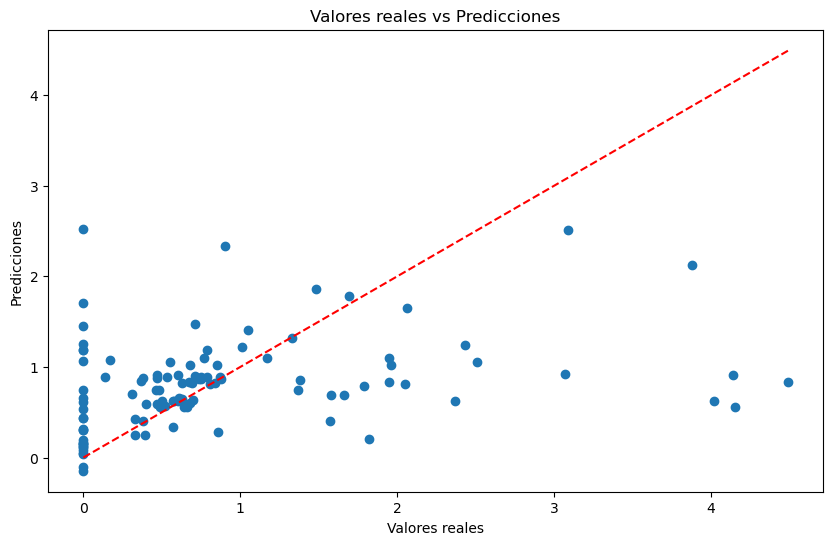

In [300]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Valores reales vs Predicciones')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.show()

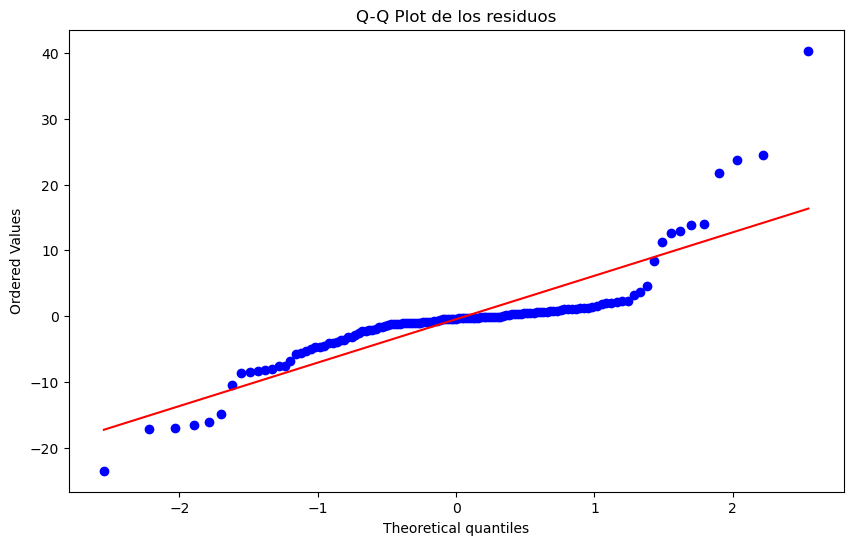

In [302]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q Plot de los residuos')
plt.show()

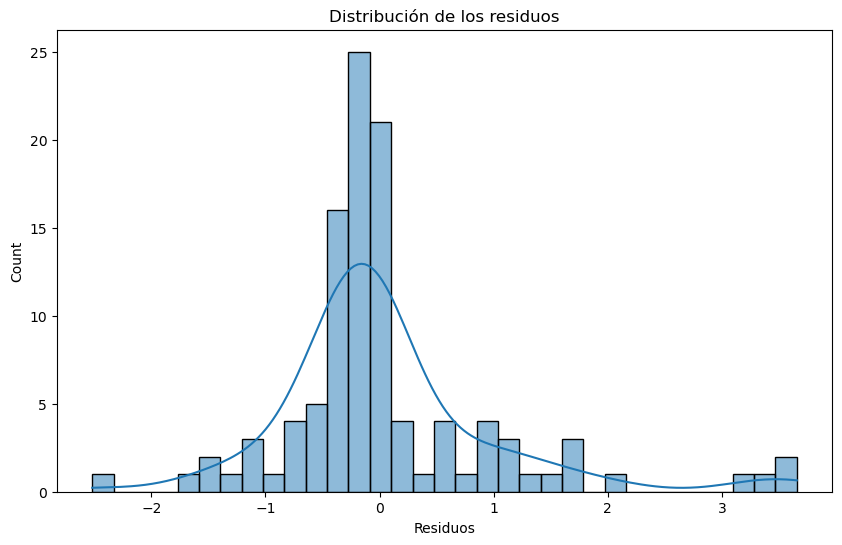

In [304]:
residuos = Y_test - Y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de los residuos')
plt.show()